# Author: Pranshu Sharma 
# Supervised Machine Learning(Task no.1)

### Predict the percentage of a student based on the no. of study hours

# Importing The libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Loading the Dataset

In [2]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
# Shape of data set
print("Shape of dataset: ",data.shape)
print()

#Data Type of various columns
print("Datatypes of the dataset:")
print(data.dtypes)

Shape of dataset:  (25, 2)

Datatypes of the dataset:
Hours     float64
Scores      int64
dtype: object


In [8]:
## checking for duplicates
data.duplicated().sum()

0

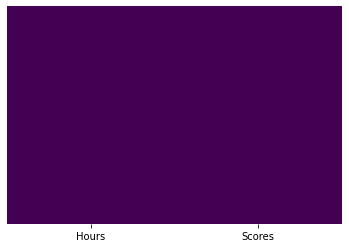

In [10]:
## Checking for Null values

sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

#### therefore no null values

# Data Visualization

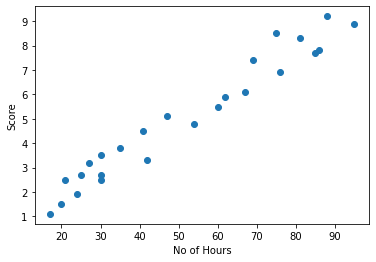

In [12]:
plt.scatter(x='Scores',y='Hours',data=data)
plt.xlabel('No of Hours')
plt.ylabel( 'Score')
plt.show()

# checking correlation between the features

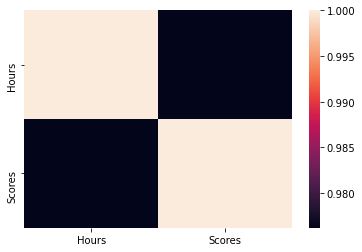

In [13]:
sns.heatmap(data.corr())

In [14]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


# Splitting Data

In [25]:
x = data.iloc[:,:-1].values
y = data.iloc[:,1].values

# Train_Test_Split

In [26]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=100)

# Applying Linear Regression

In [27]:
lin_model = LinearRegression()

In [29]:
lin_model.fit(X_train,Y_train)

LinearRegression()

In [36]:
## checking coeffcient and intercept

print("Coefficient: ", lin_model.coef_[0])
print("Intercept: ", lin_model.intercept_)

Coefficient:  9.835444382798391
Intercept:  1.9894231109746912


In [39]:
line = x*lin_model.coef_[0]+lin_model.intercept_

# Plotting the Regression Line

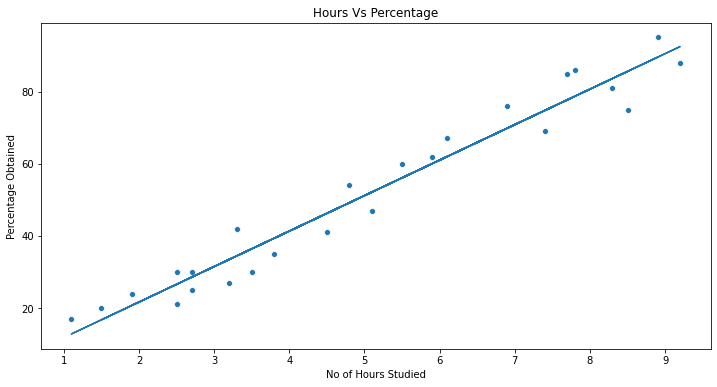

In [40]:
plt.figure(figsize=(12,6))
ax = sns.scatterplot(x=data['Hours'], y=data['Scores'])
ax.set_xlabel('No of Hours Studied')
ax.set_ylabel('Percentage Obtained')
ax.set_title("Hours Vs Percentage")
plt.plot(x, line)
plt.show()

In [43]:
pred = lin_model.predict(X_test)


In [44]:
pred

array([28.54512294, 39.36411177, 34.44638957, 60.01854497, 16.74258969])

In [47]:
r2 = r2_score(Y_test, pred)
print(r2)

0.9050356232459791


#### What will be predicted score if a student studies for 9.25 hrs/ day?

In [48]:
value =[[9.25]]

In [49]:
print('The predicted score is',lin_model.predict(value))

The predicted score is [92.96728365]
